In [12]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load your data
on_base = pl.scan_parquet("../data/throw_home_runner_on_third_wide_sprint_arm.parquet")

on_base = on_base.with_columns(
    pl.when(pl.col("event_type").is_in(["sac_fly", "sac_fly_double_play"]))
    .then(pl.lit(1))
    .otherwise(pl.lit(0))
    .alias("is_successful")
)

# Select relevant columns and drop nulls
on_base = on_base.select([
    "distance_traveled_fielder",
    "distance_catch_to_home",
    "distance_to_home_diff",
    "seconds_since_hit_085_mlb_person_id_R3",
    "max_arm_strength_fielder_mlb_person_id",
    #"is_successful"
]).drop_nulls().collect()

/var/folders/6y/k6lrq3cd0j39j18tzvrwcvr00000gn/T/ipykernel_3937/2131163499.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=20)


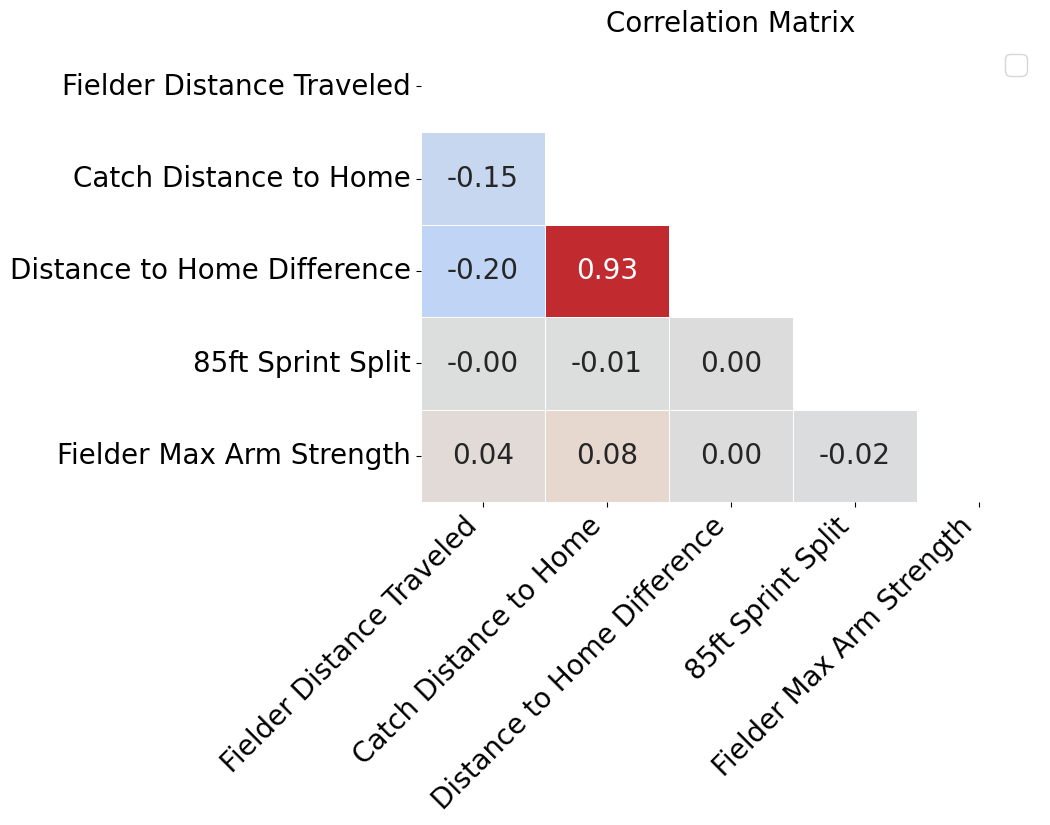

In [22]:
# Calculate the correlation matrix and convert to Pandas
on_base_corr = on_base.to_pandas().corr()

# Create a mask to hide the upper triangle
mask = np.zeros_like(on_base_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Improve column names for readability (optional but recommended)
readable_labels = {
    "distance_traveled_fielder": "Fielder Distance Traveled",
    "distance_traveled_all_fielders": "All Fielders Distance Traveled",
    "distance_catch_to_home": "Catch Distance to Home",
    "distance_to_home_diff": "Distance to Home Difference",
    "seconds_since_hit_085_mlb_person_id_R3": "85ft Sprint Split",
    "max_arm_strength_fielder_mlb_person_id": "Fielder Max Arm Strength",
    #"is_successful": "Successful Sac Fly"
}
on_base_corr.rename(index=readable_labels, columns=readable_labels, inplace=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(on_base_corr,
            mask=mask,
            cmap='coolwarm',
            cbar=False,
            vmin=-1,
            vmax=1,
            annot=True,
            fmt=".2f",
            annot_kws={"size": 20},
            linewidths=.5,
            cbar_kws={"shrink": .75})
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.legend(fontsize=20)
plt.show()

/var/folders/6y/k6lrq3cd0j39j18tzvrwcvr00000gn/T/ipykernel_3937/3064007895.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x='sac_fly_outcome', y='sprint_speed_runner',


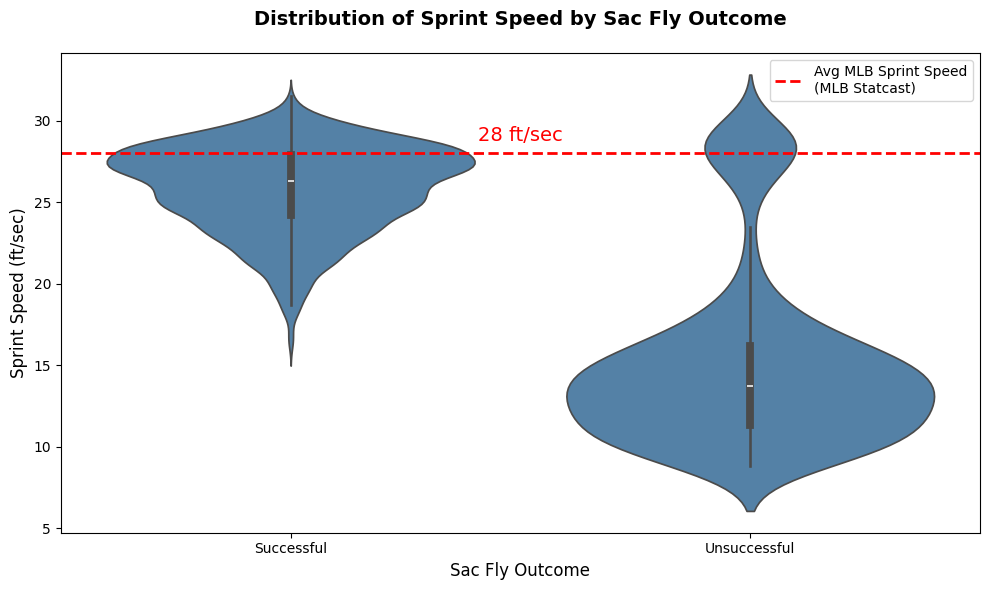

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

on_base = pl.scan_parquet("../data/throw_home_runner_on_third_wide_sprint_arm.parquet")
on_base = on_base.with_columns(
    pl.when(pl.col("event_type").is_in(["sac_fly", "sac_fly_double_play"]))
    .then(pl.lit(1))
    .otherwise(pl.lit(0))
    .alias("is_successful")
)
# Select relevant columns and drop nulls
on_base = on_base.select([
    "arm_strength",
    "sprint_speed_runner",
    "distance_traveled_fielder",
    "distance_catch_to_home",
    "distance_to_home_diff",
    "seconds_since_hit_085_mlb_person_id_R3",
    "max_arm_strength_fielder_mlb_person_id",
    "is_successful"
]).drop_nulls().collect()

# Create outcome labels for better visualization
on_base_plot = on_base.with_columns(
    pl.when(pl.col("is_successful") == 1)
    .then(pl.lit("Successful"))
    .otherwise(pl.lit("Unsuccessful"))
    .alias("sac_fly_outcome")
)

# Convert to pandas for seaborn (if needed)
df_plot = on_base_plot.to_pandas()

plt.figure(figsize=(10, 6))

# Create the violin plot - using sprint speed 
sns.violinplot(data=df_plot, x='sac_fly_outcome', y='sprint_speed_runner', 
               palette=['steelblue', 'steelblue'], inner='box')

# Customize the plot
plt.title('Distribution of Sprint Speed by Sac Fly Outcome', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sac Fly Outcome', fontsize=12)
plt.ylabel('Sprint Speed (ft/sec)', fontsize=12)

# Add MLB average line with proper annotation
plt.axhline(y=28, color='red', linestyle='--', linewidth=2,
            label='Avg MLB Sprint Speed\n(MLB Statcast)')

# Add annotated text above the line
plt.text(0.5, 28.5, '28 ft/sec', ha='center', va='bottom', 
         fontsize=14, color='red')

plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

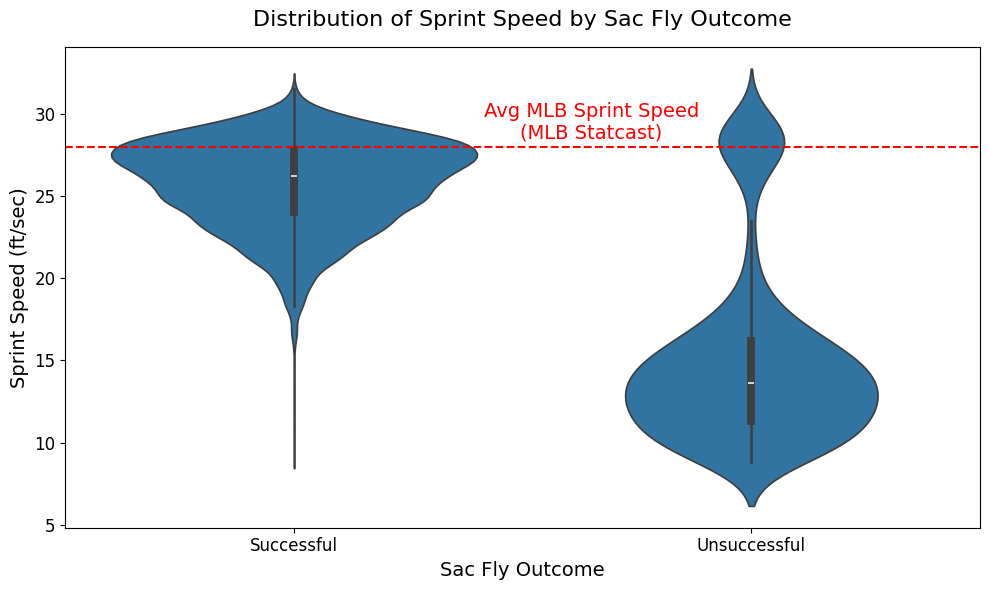

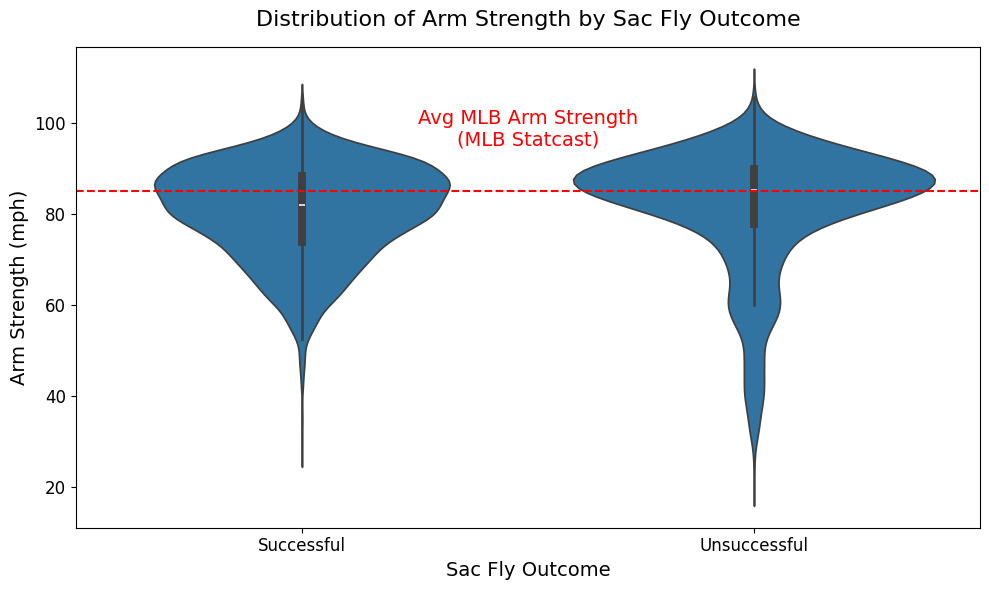